/home/beauty/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.1158

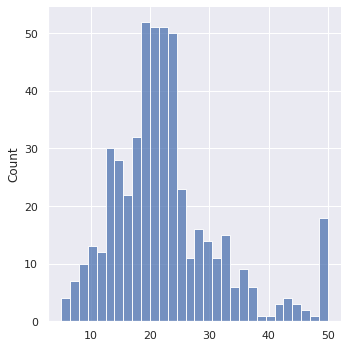

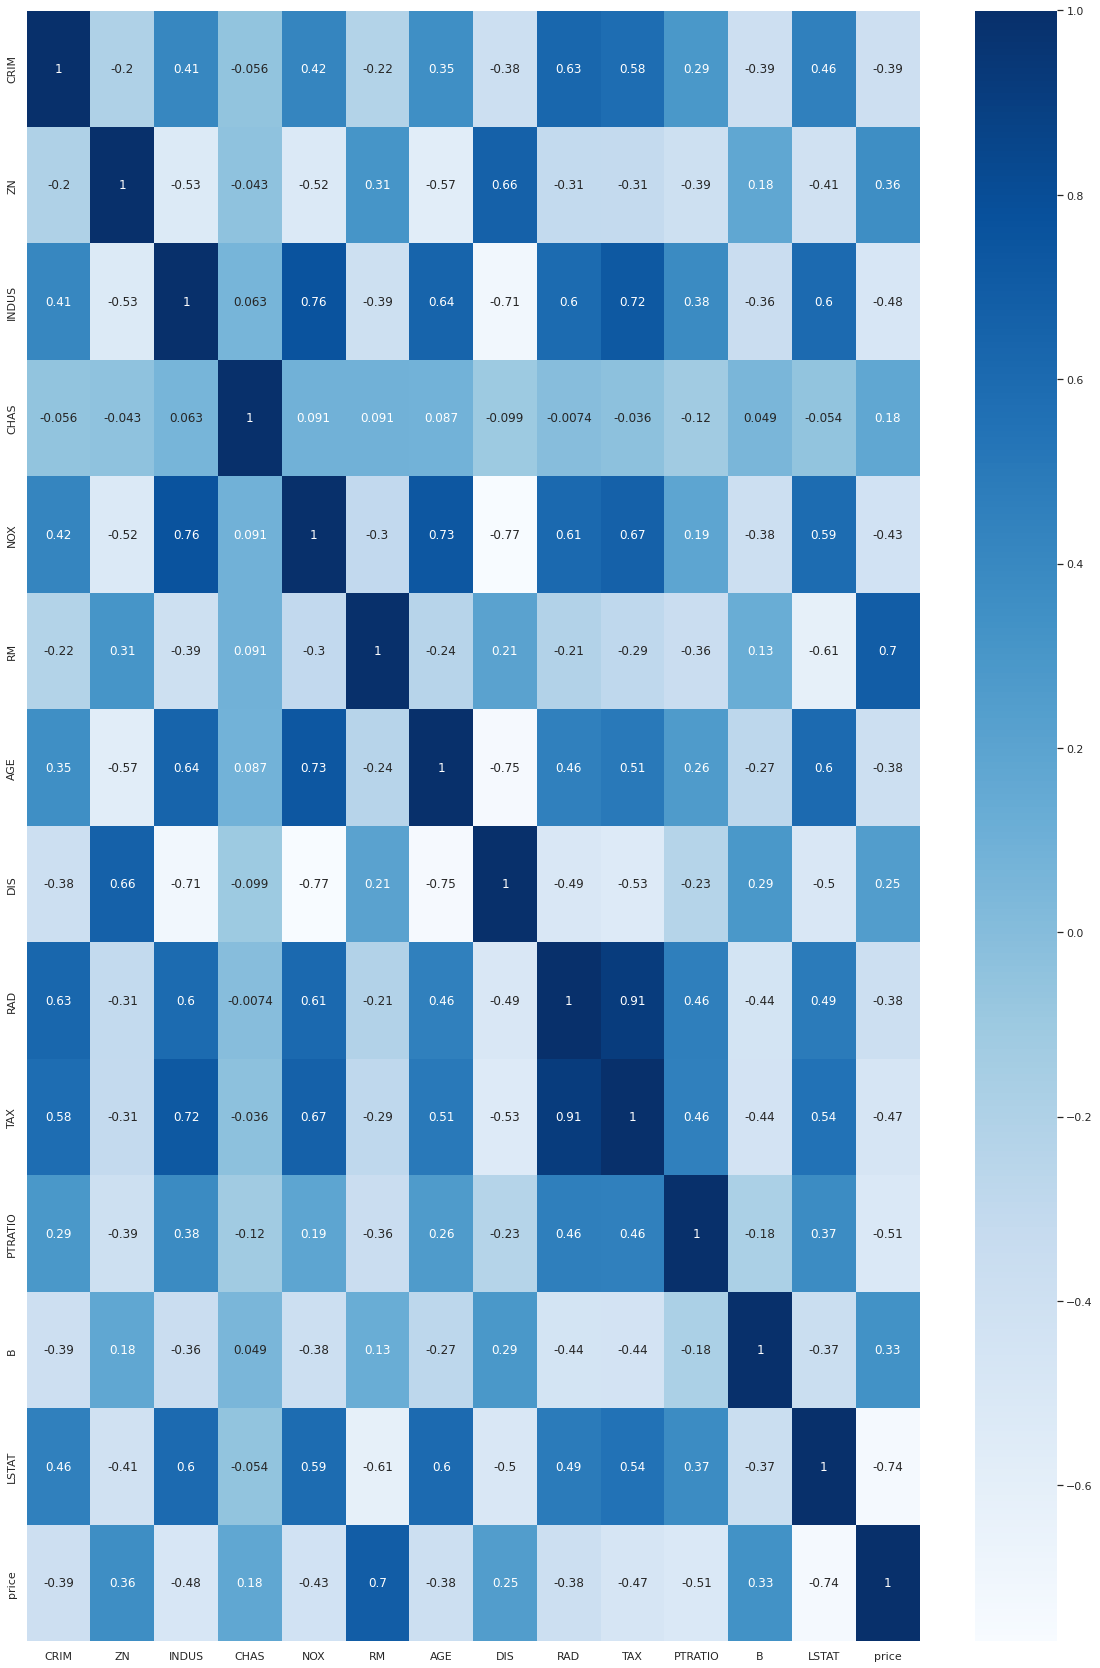

training data length: 354
test data length: 152

 Coefficient estimate by Linear Model 
     Columns  Coefficient_estimate
0      CRIM             -0.134081
1        ZN              0.046902
2     INDUS              0.035619
3      CHAS              3.015694
4       NOX            -20.737059
5        RM              3.557167
6       AGE              0.003711
7       DIS             -1.688389
8       RAD              0.318711
9       TAX             -0.009530
10  PTRATIO             -0.944585
11        B              0.009563
12    LSTAT             -0.670695

 Intercept 40.46758407522026



 Mean Squared error:   21.95193022642514

 R2 Score:  0.7069850488689627

 Root mean squared error:  4.685288702569474


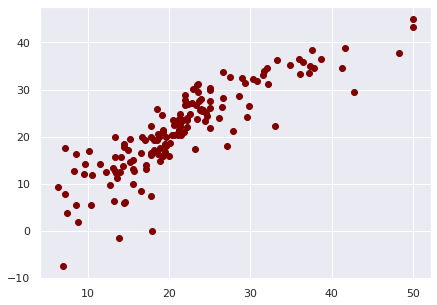

In [128]:
#Linear regression

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_dataset=load_boston()
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
print(boston_dataset.feature_names)
print(boston.head())
boston['price']=boston_dataset.target
print(boston.describe())
print(boston.info())
print(boston.head())

import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})
sns.displot(boston_dataset.target,bins=30)
plt.show()

corr=boston.corr()
plt.figure(figsize=(20,30))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

target=boston['price'].values
features=boston.drop(['price'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3)
print("training data length:",len(x_train))
print("test data length:",len(x_test))

r=LinearRegression()
r.fit(x_train,y_train)
r.score(x_test,y_test)
y_pred=r.predict(x_test)


plt.scatter(y_test,y_pred,c="maroon")

lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=boston_dataset.feature_names
lreg_coefficient["Coefficient_estimate"]=pd.Series(r.coef_)

print('\n Coefficient estimate by Linear Model \n',lreg_coefficient)
print('\n Intercept',r.intercept_)

print('\n\n\n Mean Squared error:  ',mean_squared_error(y_test,y_pred))
print('\n R2 Score: ',r2_score(y_test,y_pred))
print('\n Root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred)))


           GENDER         AGE     SMOKING  YELLOW_0INGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONIC DISEASE    0ATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        1.501618         1.504854    1.673139    1.556634    1.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         1.000000         1.000

/home/beauty/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


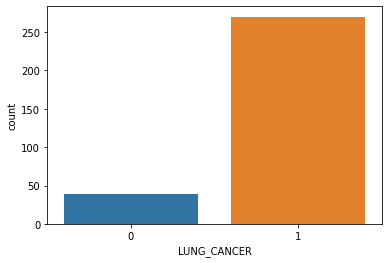

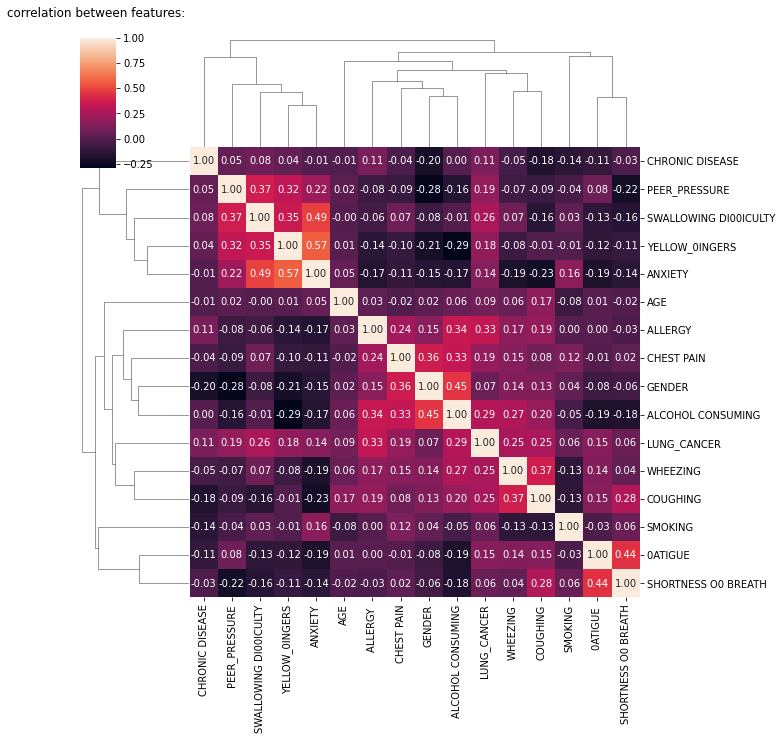


training data length: 216

test data length: 93

 Accuracy Score: 0.9139784946236559
confusion matrix:  
 [[ 6  7]
 [ 1 79]]
Performance measure:                precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.92      0.99      0.95        80

    accuracy                           0.91        93
   macro avg       0.89      0.72      0.78        93
weighted avg       0.91      0.91      0.90        93

prediction probability:  [[0.004 0.996]
 [0.319 0.681]
 [0.013 0.987]
 [0.096 0.904]
 [0.347 0.653]
 [0.429 0.571]
 [0.476 0.524]
 [0.002 0.998]
 [0.048 0.952]
 [0.019 0.981]
 [0.235 0.765]
 [0.026 0.974]
 [0.021 0.979]
 [0.1   0.9  ]
 [0.028 0.972]
 [0.1   0.9  ]
 [0.643 0.357]
 [0.008 0.992]
 [0.016 0.984]
 [0.006 0.994]
 [0.027 0.973]
 [0.006 0.994]
 [0.05  0.95 ]
 [0.108 0.892]
 [0.018 0.982]
 [0.001 0.999]
 [0.012 0.988]
 [0.254 0.746]
 [0.241 0.759]
 [0.125 0.875]
 [0.083 0.917]
 [0.004 0.996]
 [0.001 0.999]
 [0.0

/home/beauty/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
#Logistic Regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df=pd.read_csv("/home/beauty/lung_cancer.csv")
print(df.describe())
print(df.info())
print(df.head())
print('\n')

sns.countplot(df['LUNG_CANCER'])
print(df.LUNG_CANCER.value_counts())


corr=df.corr()
sns.clustermap(corr,annot=True,fmt='.2f')
plt.title('correlation between features: \n ')
plt.show()

target=df['LUNG_CANCER'].values
features=df.drop(['LUNG_CANCER'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3)
print("\ntraining data length:",len(x_train))
print("\ntest data length:",len(x_test))


lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred=lr.predict(x_test)


print("\n Accuracy Score:",accuracy_score(y_test,y_pred))
print("confusion matrix:  \n",confusion_matrix(y_test,y_pred))
print("Performance measure: ",classification_report(y_test,y_pred))

      
print("prediction probability: ",np.round(lr.predict_proba(x_test),3))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


0    50
1    50
2    50
Name: target, dtype: int64
112
38
[2 1 1 2 2 0 2 2 2 1 0 1 2 2 2 0 1 0 2 0 0 0 0 2 1 1 0 0 0 0 0 2 0 2 0 0 0
 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



 Confustion Matrix : 
 [[18  0  0]
 [ 0  7  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



/home/beauty/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


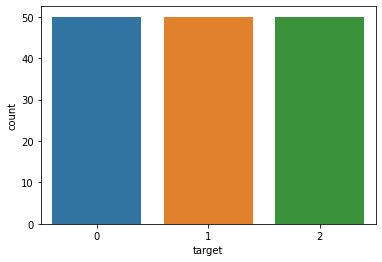

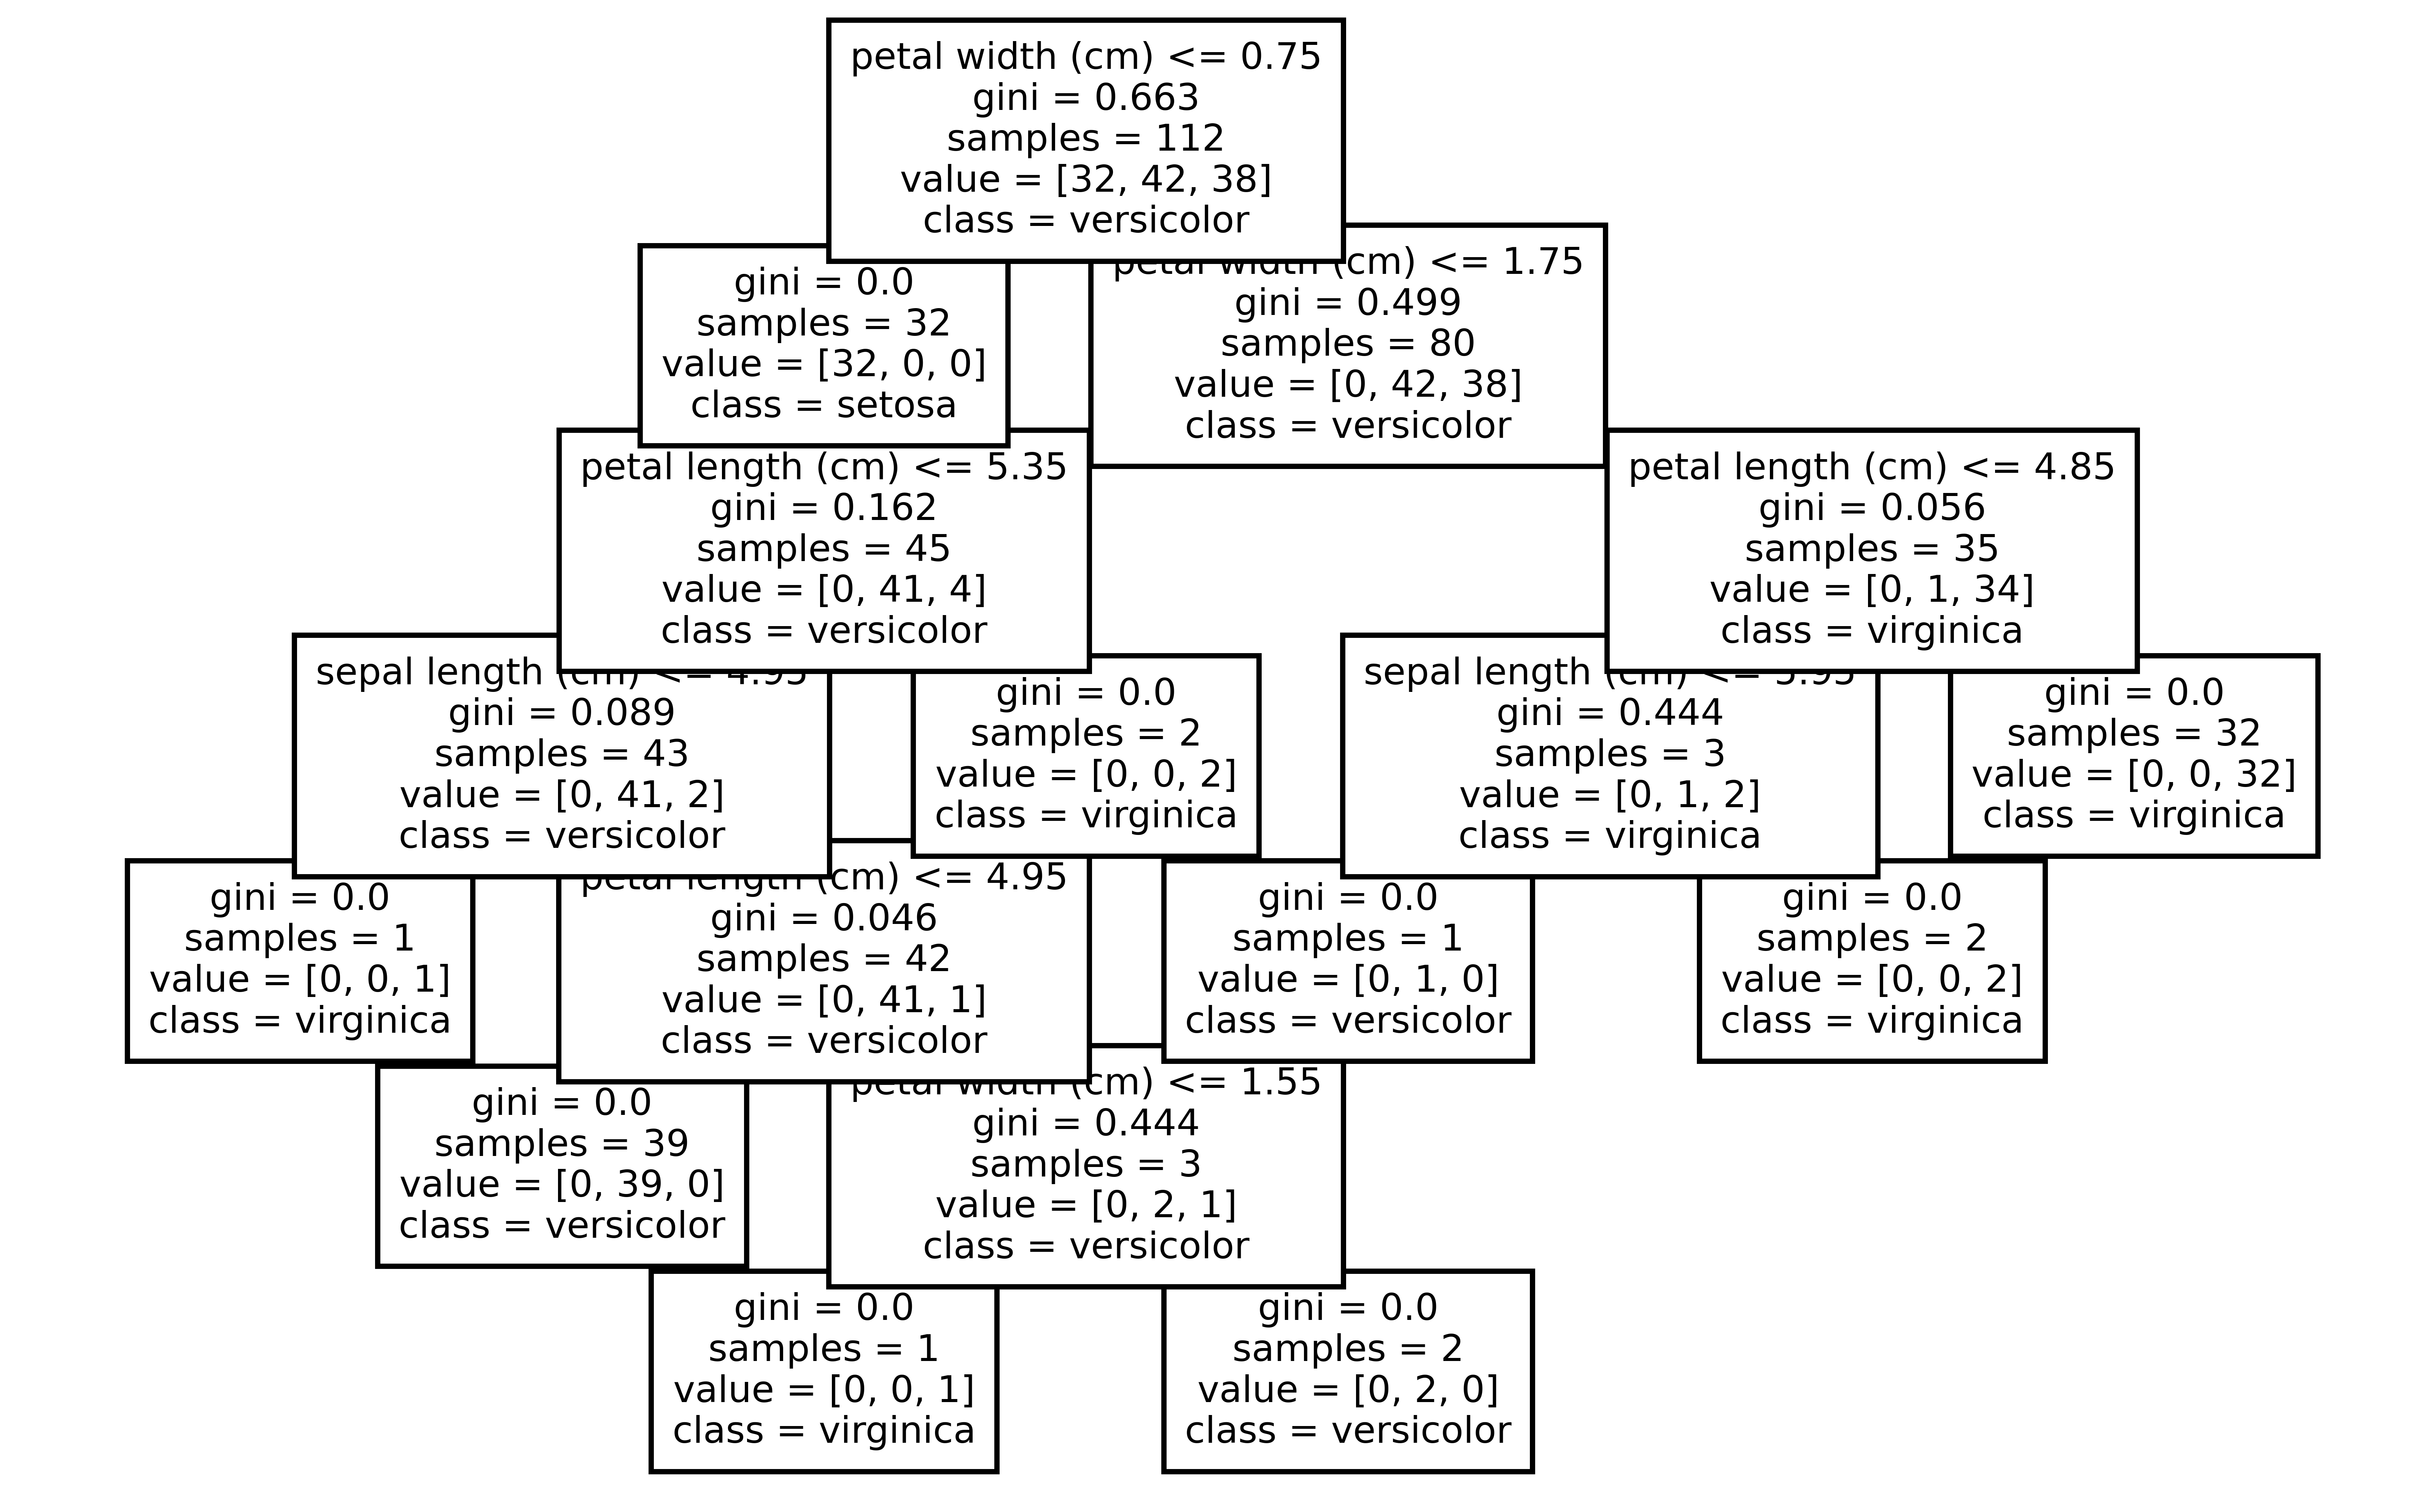

In [6]:
#Decision Tree with iris dataset

import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(data.feature_names)
print("\n")
df['target'] = data.target

#checking the distribution of the iris dataset
sns.countplot(df['target'])
print(df['target'].value_counts())


# Split Training and Test Dataset
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'])
print(len(X_train))
print(len(X_test))

# DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(criterion="gini")

# Fit model
model = DT.fit(X_train, Y_train)
y_preds = model.predict(X_test)
print(y_preds)

print(data.feature_names)
print("\n")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,5), dpi=1000)
tree.plot_tree(DT,fontsize=7, feature_names=data.feature_names, class_names=data.target_names)


print("\n Confustion Matrix : \n",confusion_matrix(Y_test,y_preds))
print(classification_report(Y_test, y_preds))